In [4]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

url = "https://rwdy.in/shop/top-wear"
response = requests.get(url)
soup = BeautifulSoup(response.text, "html.parser")

print(soup.prettify())  

<!DOCTYPE html>
<html data-sentry-component="RootLayout" data-sentry-source-file="layout.tsx" lang="en">
 <head>
  <meta charset="utf-8"/>
  <meta content="width=device-width, initial-scale=1" name="viewport"/>
  <link as="font" crossorigin="" href="/_next/static/media/0484562807a97172-s.p.woff2" rel="preload" type="font/woff2"/>
  <link as="font" crossorigin="" href="/_next/static/media/4c285fdca692ea22-s.p.woff2" rel="preload" type="font/woff2"/>
  <link as="font" crossorigin="" href="/_next/static/media/6245472ced48d3be-s.p.woff2" rel="preload" type="font/woff2"/>
  <link as="font" crossorigin="" href="/_next/static/media/7108afb8b1381ad1-s.p.woff2" rel="preload" type="font/woff2"/>
  <link as="font" crossorigin="" href="/_next/static/media/7db6c35d839a711c-s.p.woff2" rel="preload" type="font/woff2"/>
  <link as="font" crossorigin="" href="/_next/static/media/8888a3826f4a3af4-s.p.woff2" rel="preload" type="font/woff2"/>
  <link as="font" crossorigin="" href="/_next/static/media/9e82

In [5]:
links = soup.find_all("a", attrs={"class": "w-full"})

In [6]:
link=links[0].get('href')

In [7]:
product_link= "https://rwdy.in"+link

In [8]:
product_link

'https://rwdy.in/p/rwdy-mono-flow-linen-culture-shirt-ivory-dune?color=ivory-dune'

In [9]:
new_response = requests.get(product_link,url)

In [10]:
new_response

<Response [200]>

In [11]:
new_soup = BeautifulSoup(new_response.text, "html.parser")

In [12]:
print(new_soup.prettify())

<!DOCTYPE html>
<html data-sentry-component="RootLayout" data-sentry-source-file="layout.tsx" lang="en">
 <head>
  <meta charset="utf-8"/>
  <meta content="width=device-width, initial-scale=1" name="viewport"/>
  <link as="font" crossorigin="" href="/_next/static/media/0484562807a97172-s.p.woff2" rel="preload" type="font/woff2"/>
  <link as="font" crossorigin="" href="/_next/static/media/4c285fdca692ea22-s.p.woff2" rel="preload" type="font/woff2"/>
  <link as="font" crossorigin="" href="/_next/static/media/6245472ced48d3be-s.p.woff2" rel="preload" type="font/woff2"/>
  <link as="font" crossorigin="" href="/_next/static/media/7108afb8b1381ad1-s.p.woff2" rel="preload" type="font/woff2"/>
  <link as="font" crossorigin="" href="/_next/static/media/7db6c35d839a711c-s.p.woff2" rel="preload" type="font/woff2"/>
  <link as="font" crossorigin="" href="/_next/static/media/8888a3826f4a3af4-s.p.woff2" rel="preload" type="font/woff2"/>
  <link as="font" crossorigin="" href="/_next/static/media/9e82

In [13]:
price=new_soup.find("div", attrs={"class":"font-bold"}).text

In [14]:
print(price)

₹ 3190


In [15]:
def get_title(soup):
    try:
        title = soup.find("div", attrs={"class": "text-2xl flex-grow"})  
        title_string = title.text.strip()  
    except AttributeError:
        title_string = "" 
    return title_string

def get_price(soup):
    try:
        price = soup.find("div", attrs={"class": "font-bold"})  # Find price element
        price_string = price.text.strip()  # Extract text and clean spaces
    except AttributeError:
        price_string = ""  # Default empty string if price not found
    return price_string


In [16]:
links = soup.find_all("a", attrs={"class": "w-full"})
links_list = []
for link in links:
    links_list.append(link.get("href"))
d = {"title": [], "price": []}

for link in links_list:
    new_webpage = requests.get("https://rwdy.in"+link)
    new_soup = BeautifulSoup(new_webpage.content, "html.parser")

    # Function calls to extract product information
    d["title"].append(get_title(new_soup))
    d["price"].append(get_price(new_soup))
df = pd.DataFrame(d)
print(df)

                                             title   price
0   RWDY MONO FLOW LINEN CULTURE SHIRT |IVORY DUNE  ₹ 3190
1                 RWDY MONO FLOW SHIRT | OLIVE FOG  ₹ 3190
2                RWDY MONO FLOW SHIRT | DEEP COCOA  ₹ 3190
3                RWDY MONO FLOW SHIRT | DUSTY PLUM  ₹ 3190
4                     RWDY MONO FLOW SHIRT | PEARL  ₹ 3190
..                                             ...     ...
84                   STREET TANK COMBO (PACK OF 3)  ₹ 1890
85                                     STREET TANK   ₹ 690
86                                     STREET TANK   ₹ 690
87                                     STREET TANK   ₹ 690
88                                                        

[89 rows x 2 columns]


In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

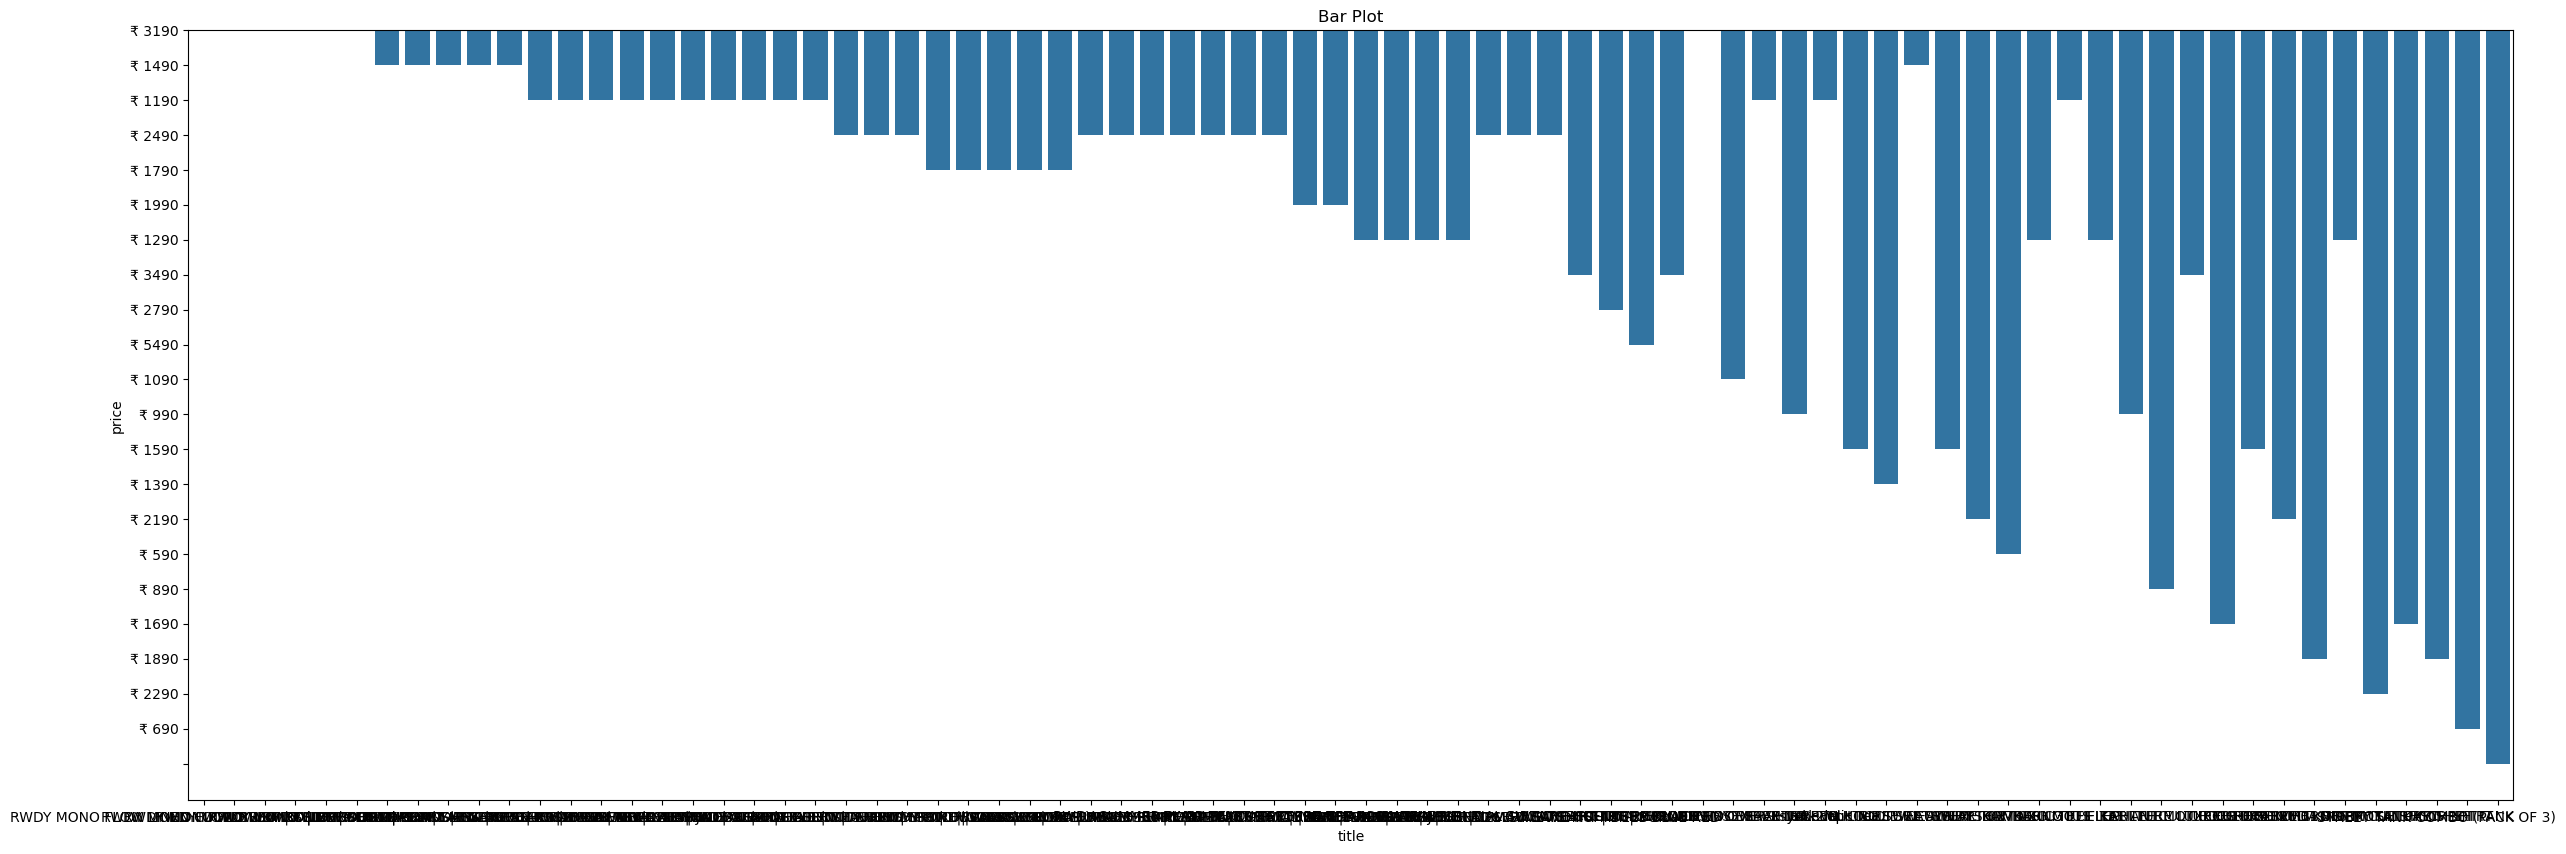

In [21]:
plt.figure(figsize=(30,10))
sns.barplot(x="title",y="price",data=df)
plt.title("Bar Plot")  
plt.show() 

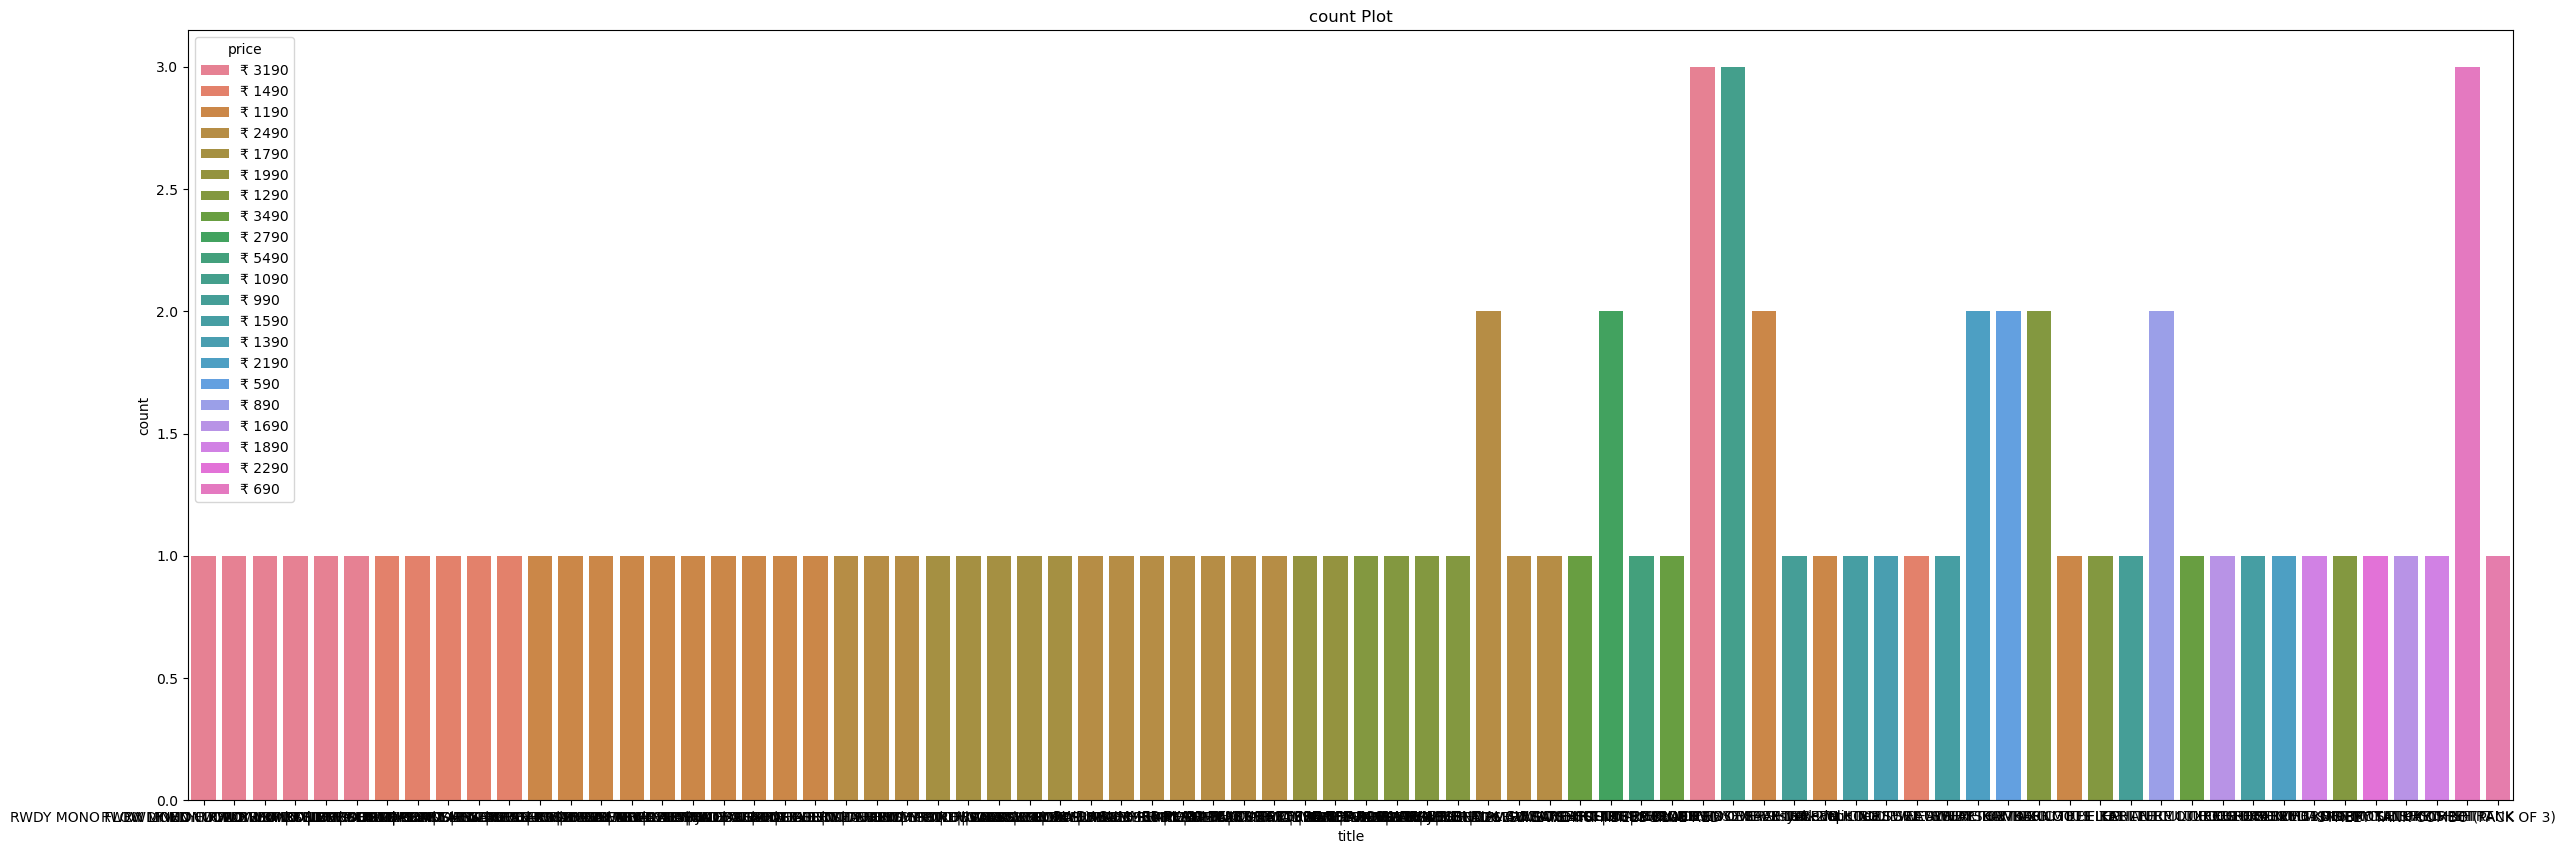

In [23]:
plt.figure(figsize=(30,10))
sns.countplot(x="title",hue="price",data=df)
plt.title("count Plot")  
plt.show() 

In [28]:
import mpl_toolkits.mplot3d as p3
import numpy as np

In [29]:
X = np.linspace(-5, 5, 100)
Y = np.linspace(-5, 5, 100)

X, Y = np.meshgrid(X, Y)  

Z = np.sin(np.sqrt(X**2 + Y**2)) 

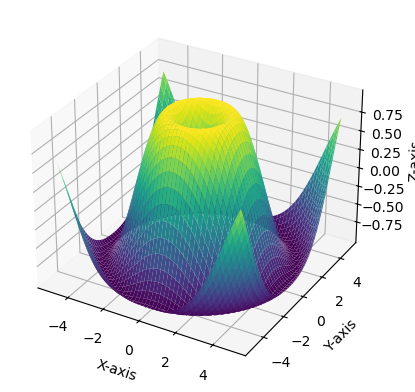

In [31]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure() 
ax = fig.add_subplot(111, projection='3d')  

ax.plot_surface(X, Y, Z, cmap='viridis')  
ax.set_xlabel('X-axis')  
ax.set_ylabel('Y-axis')  
ax.set_zlabel('Z-axis')  

plt.show()

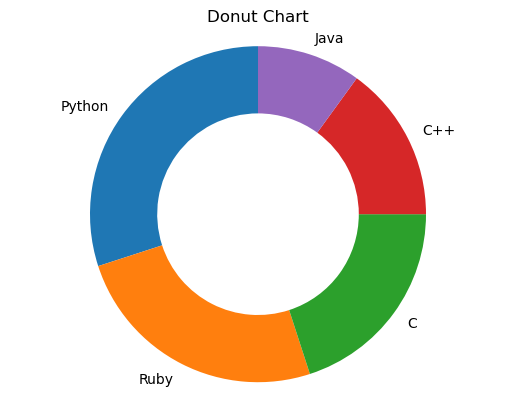

In [33]:
labels = ['Python', 'Ruby', 'C', 'C++', 'Java']
sizes = [30, 25, 20, 15, 10]  
fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, startangle=90, wedgeprops={'width': 0.4})
ax.axis('equal')
plt.title("Donut Chart")
plt.show()

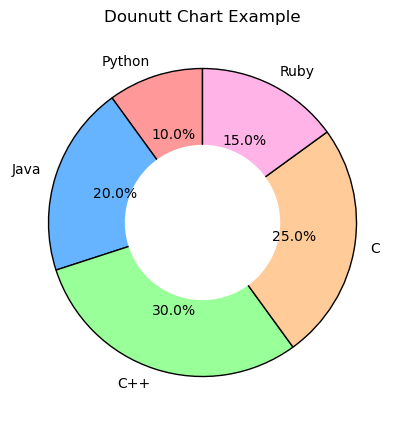

In [35]:
labels = ['Python', 'Java', 'C++', 'C', 'Ruby']
sizes = [10, 20, 30, 25, 15]
colors = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99', '#ffb3e6']

fig, ax = plt.subplots(figsize=(10, 5))
ax.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90, wedgeprops={'edgecolor': 'black'})

center_circle = plt.Circle((0, 0), 0.5, color='white')
ax.add_artist(center_circle)

plt.title("Dounutt Chart Example")
plt.show()

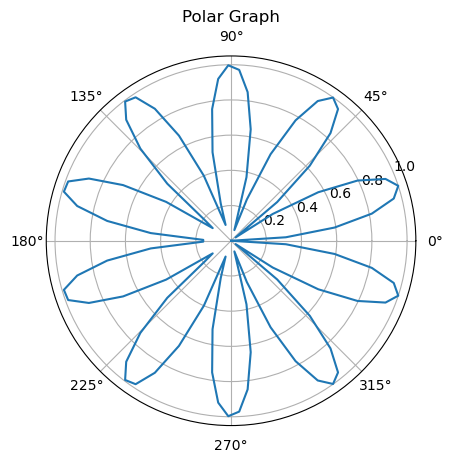

In [36]:
import numpy as np
import matplotlib.pyplot as plt

theta = np.linspace(0, 2 * np.pi, 100)
r = np.abs(np.sin(5 * theta))
plt.figure()
ax = plt.subplot(111, projection='polar')
ax.plot(theta, r)
plt.title('Polar Graph')
plt.show()